<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/Car_Sales_Forecasting_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Sales Forecasting with Prophet

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

Monthly car sales in Quebec 1960-1968 <br>
Dataset source: Time Series Data Library (citing: Abraham & Ledolter (1983))

# Libraries

## Installing Libraries

In [ ]:
!pip install fbprophet

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

## Importing Libraries

In [54]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

import fbprophet
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
fbprophet.__version__

'0.7.1'

# Dataset Overview

## Reading Dataset

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

data = pd.read_csv(path)
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


## Duplicated Values

In [4]:
data.duplicated().sum()

0

## Missing Values

In [5]:
data.isna().sum()

Month    0
Sales    0
dtype: int64

## Visualize

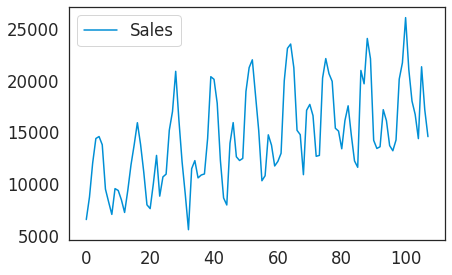

In [9]:
data.plot()

plt.show()

# Model Development

Without train-test split

## Preparation

The first column must have the name `ds` and contain the date-times. The second column must have the name `y` and contain the observations.

### Rename Columns

In [11]:
data = data.rename(columns={'Month':'ds',
                            'Sales':'y'})
data.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


### Change Data Type

In [16]:
type(data.loc[0, 'ds'])

str

In [18]:
data['ds'] = pd.to_datetime(data['ds'])

In [19]:
type(data.loc[0, 'ds'])

pandas._libs.tslibs.timestamps.Timestamp

## Train Model

In [20]:
model = Prophet()

model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## In-Sample Forecast

In-sample means we will use test set from the historical data. In this case, I will use the last 12 month of the dataset.

### Create Test Set

In [24]:
# define the period for which we want a prediction
data_future = list()

# loop over one year of dates
for i in range(1, 13):
  # create a string for each month
	date = f'1968-{i:02d}'
	data_future.append([date])

# create dataframe 
data_future = pd.DataFrame(data_future, columns=['ds'])
# convert to date-time
data_future['ds'] = pd.to_datetime(data_future['ds'])

data_future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


### Forecasting

Perhaps the most important columns are the forecast date time (`ds`), the forecasted value (`yhat`), and the lower and upper bounds on the predicted value (`yhat_lower` and `yhat_upper`) that provide uncertainty of the forecast.

In [26]:
result = model.predict(data_future)
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17795.101,12802.463,15958.577,17795.101,17795.101,-3460.363,-3460.363,-3460.363,-3460.363,-3460.363,-3460.363,0.0,0.0,0.0,14334.738
1,1968-02-01,17850.077,13286.022,16512.717,17850.077,17850.077,-2944.121,-2944.121,-2944.121,-2944.121,-2944.121,-2944.121,0.0,0.0,0.0,14905.956
2,1968-03-01,17901.506,19228.550,22384.172,17901.506,17901.506,2940.645,2940.645,2940.645,2940.645,2940.645,2940.645,0.0,0.0,0.0,20842.151
3,1968-04-01,17956.481,21335.281,24417.034,17956.481,17956.481,4913.614,4913.614,4913.614,4913.614,4913.614,4913.614,0.0,0.0,0.0,22870.095
4,1968-05-01,18009.684,22582.187,25716.640,18009.684,18009.684,6166.528,6166.528,6166.528,6166.528,6166.528,6166.528,0.0,0.0,0.0,24176.211
5,1968-06-01,18064.659,19545.750,22558.280,18064.659,18064.659,2993.020,2993.020,2993.020,2993.020,2993.020,2993.020,0.0,0.0,0.0,21057.679
6,1968-07-01,18117.861,16062.291,19161.448,18117.861,18117.861,-532.372,-532.372,-532.372,-532.372,-532.372,-532.372,0.0,0.0,0.0,17585.489
7,1968-08-01,18172.837,13695.382,16789.557,18172.837,18172.837,-2883.575,-2883.575,-2883.575,-2883.575,-2883.575,-2883.575,0.0,0.0,0.0,15289.262
8,1968-09-01,18227.813,12111.718,15204.681,18227.813,18227.813,-4506.374,-4506.374,-4506.374,-4506.374,-4506.374,-4506.374,0.0,0.0,0.0,13721.438
9,1968-10-01,18281.015,16548.370,19588.052,18281.015,18281.015,-147.104,-147.104,-147.104,-147.104,-147.104,-147.104,0.0,0.0,0.0,18133.911


In [27]:
result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14334.738,12802.463,15958.577
1,1968-02-01,14905.956,13286.022,16512.717
2,1968-03-01,20842.151,19228.550,22384.172
3,1968-04-01,22870.095,21335.281,24417.034
4,1968-05-01,24176.211,22582.187,25716.640
5,1968-06-01,21057.679,19545.750,22558.280
6,1968-07-01,17585.489,16062.291,19161.448
7,1968-08-01,15289.262,13695.382,16789.557
8,1968-09-01,13721.438,12111.718,15204.681
9,1968-10-01,18133.911,16548.370,19588.052


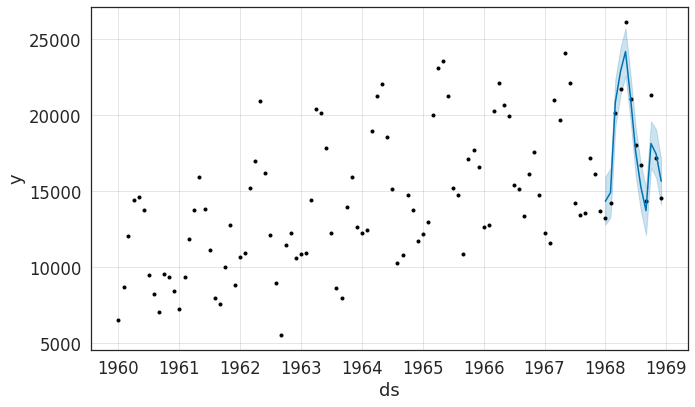

In [28]:
model.plot(result)

plt.show()

## Out-of-Sample Forecast

Out-of-sample means we really want a forecast model to make a prediction beyond the training data. In this case, a period beyond the end of the training dataset, starting 1969-01.

### Create Test Set

In [29]:
# define the period for which we want a prediction
data_future = list()

# loop over one year of dates
for i in range(1, 13):
  # create a string for each month
	date = f'1969-{i:02d}'
	data_future.append([date])

# create dataframe 
data_future = pd.DataFrame(data_future, columns=['ds'])
# convert to date-time
data_future['ds'] = pd.to_datetime(data_future['ds'])

data_future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


### Forecasting

Perhaps the most important columns are the forecast date time (`ds`), the forecasted value (`yhat`), and the lower and upper bounds on the predicted value (`yhat_lower` and `yhat_upper`) that provide uncertainty of the forecast.

In [30]:
result = model.predict(data_future)
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,18444.168,13741.139,16941.215,18444.168,18444.172,-3068.208,-3068.208,-3068.208,-3068.208,-3068.208,-3068.208,0.0,0.0,0.0,15375.960
1,1969-02-01,18499.144,14523.622,17707.305,18498.163,18500.150,-2356.872,-2356.872,-2356.872,-2356.872,-2356.872,-2356.872,0.0,0.0,0.0,16142.272
2,1969-03-01,18548.800,19774.797,22955.874,18545.919,18551.216,2803.033,2803.033,2803.033,2803.033,2803.033,2803.033,0.0,0.0,0.0,21351.833
3,1969-04-01,18603.775,21929.280,25015.060,18598.718,18608.520,4874.115,4874.115,4874.115,4874.115,4874.115,4874.115,0.0,0.0,0.0,23477.890
4,1969-05-01,18656.977,23294.622,26628.303,18649.145,18663.823,6331.463,6331.463,6331.463,6331.463,6331.463,6331.463,0.0,0.0,0.0,24988.441
5,1969-06-01,18711.953,20681.557,23940.603,18701.556,18721.341,3537.088,3537.088,3537.088,3537.088,3537.088,3537.088,0.0,0.0,0.0,22249.041
6,1969-07-01,18765.155,16324.317,19447.935,18752.064,18777.769,-862.825,-862.825,-862.825,-862.825,-862.825,-862.825,0.0,0.0,0.0,17902.330
7,1969-08-01,18820.131,14151.728,17353.785,18803.736,18835.608,-3089.929,-3089.929,-3089.929,-3089.929,-3089.929,-3089.929,0.0,0.0,0.0,15730.202
8,1969-09-01,18875.107,12683.527,15928.049,18854.791,18894.349,-4639.150,-4639.150,-4639.150,-4639.150,-4639.150,-4639.150,0.0,0.0,0.0,14235.957
9,1969-10-01,18928.309,17090.910,20257.938,18902.706,18951.429,-256.529,-256.529,-256.529,-256.529,-256.529,-256.529,0.0,0.0,0.0,18671.780


In [31]:
result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15375.960,13741.139,16941.215
1,1969-02-01,16142.272,14523.622,17707.305
2,1969-03-01,21351.833,19774.797,22955.874
3,1969-04-01,23477.890,21929.280,25015.060
4,1969-05-01,24988.441,23294.622,26628.303
5,1969-06-01,22249.041,20681.557,23940.603
6,1969-07-01,17902.330,16324.317,19447.935
7,1969-08-01,15730.202,14151.728,17353.785
8,1969-09-01,14235.957,12683.527,15928.049
9,1969-10-01,18671.780,17090.910,20257.938


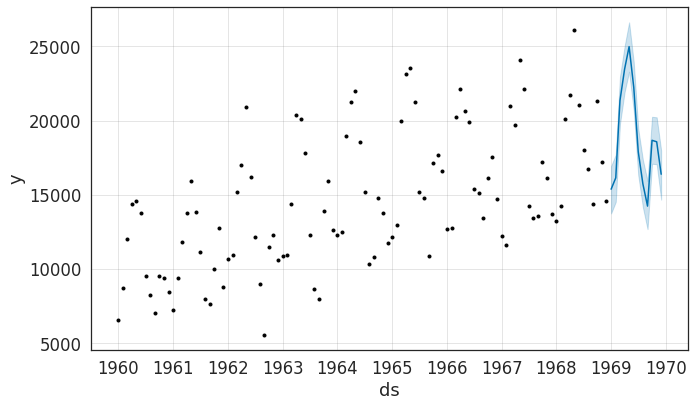

In [32]:
model.plot(result)

plt.show()

# Manually Evaluate Forecast Model

With train-test split

## Train-Test Split

In [52]:
data_train = data.iloc[:-12].copy()
data_test = data.iloc[-12:].copy()

In [53]:
data_test

,ds,y
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099
101,1968-06-01,21084
102,1968-07-01,18024
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342


## Train Model

In [55]:
model = Prophet()

model.fit(data_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

In [64]:
# must be in dataframe format
data_future = pd.DataFrame(data_test['ds'])

result = model.predict(data_future)
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17591.486,12886.207,16046.733,17591.266,17591.504,-3078.493,-3078.493,-3078.493,-3078.493,-3078.493,-3078.493,0.0,0.0,0.0,14512.993
1,1968-02-01,17639.343,13282.494,16426.981,17637.566,17640.633,-2708.434,-2708.434,-2708.434,-2708.434,-2708.434,-2708.434,0.0,0.0,0.0,14930.909
2,1968-03-01,17684.111,19309.990,22350.017,17679.787,17688.080,3158.054,3158.054,3158.054,3158.054,3158.054,3158.054,0.0,0.0,0.0,20842.165
3,1968-04-01,17731.968,21435.040,24365.466,17725.092,17739.260,5268.689,5268.689,5268.689,5268.689,5268.689,5268.689,0.0,0.0,0.0,23000.657
4,1968-05-01,17778.281,21793.897,25011.887,17768.410,17789.811,5571.868,5571.868,5571.868,5571.868,5571.868,5571.868,0.0,0.0,0.0,23350.148
5,1968-06-01,17826.137,19379.398,22598.824,17812.500,17842.189,3146.135,3146.135,3146.135,3146.135,3146.135,3146.135,0.0,0.0,0.0,20972.272
6,1968-07-01,17872.450,15844.568,18954.786,17854.325,17893.511,-512.899,-512.899,-512.899,-512.899,-512.899,-512.899,0.0,0.0,0.0,17359.551
7,1968-08-01,17920.306,13160.048,16274.304,17897.163,17946.758,-3135.103,-3135.103,-3135.103,-3135.103,-3135.103,-3135.103,0.0,0.0,0.0,14785.203
8,1968-09-01,17968.163,11824.328,14898.098,17939.422,18000.202,-4446.782,-4446.782,-4446.782,-4446.782,-4446.782,-4446.782,0.0,0.0,0.0,13521.381
9,1968-10-01,18014.475,15477.904,18588.656,17979.860,18052.503,-956.442,-956.442,-956.442,-956.442,-956.442,-956.442,0.0,0.0,0.0,17058.033


In [65]:
result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14512.993,12886.207,16046.733
1,1968-02-01,14930.909,13282.494,16426.981
2,1968-03-01,20842.165,19309.990,22350.017
3,1968-04-01,23000.657,21435.040,24365.466
4,1968-05-01,23350.148,21793.897,25011.887
5,1968-06-01,20972.272,19379.398,22598.824
6,1968-07-01,17359.551,15844.568,18954.786
7,1968-08-01,14785.203,13160.048,16274.304
8,1968-09-01,13521.381,11824.328,14898.098
9,1968-10-01,17058.033,15477.904,18588.656


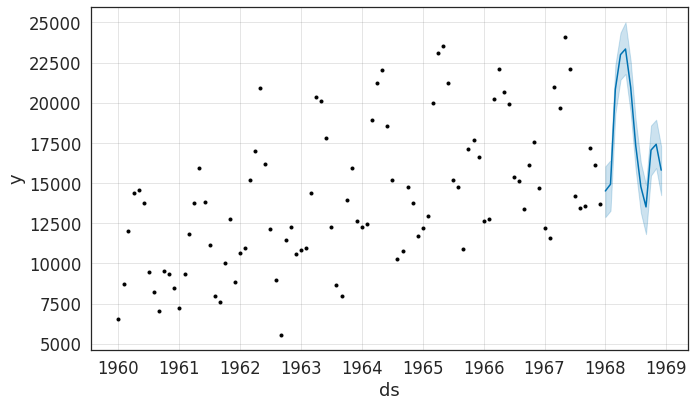

In [66]:
model.plot(result)

plt.show()

## Evaluation

In [81]:
y_true = data_test['y'].values
y_pred = result['yhat'].values

In [82]:
mae = mean_absolute_error(y_true, y_pred)
mae

1336.813762330031

In [83]:
mse = mean_squared_error(y_true, y_pred)
mse

3059668.8995935176

In [84]:
rmse = np.sqrt(mse)
rmse

1749.190927141322

## Visualize

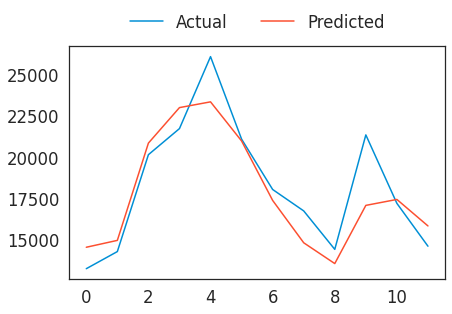

In [85]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.legend(loc='lower center', bbox_to_anchor=[0.5, 1], 
           ncol=2, frameon=False)

plt.show()

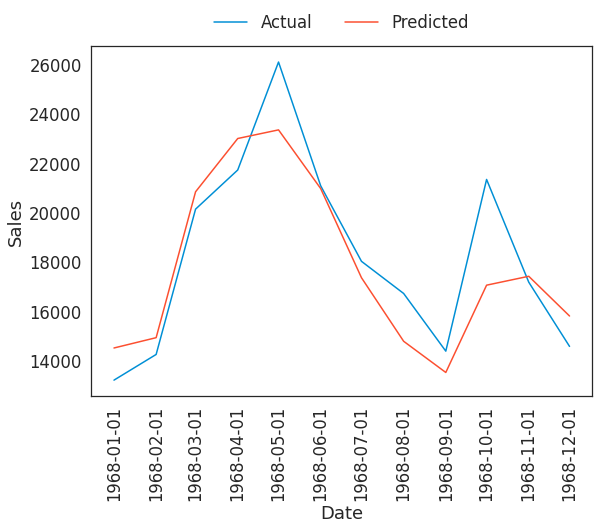

In [115]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=data_test, x='ds', y='y', ax=ax, label='Actual')
sns.lineplot(data=result, x='ds', y='yhat', ax=ax, label='Predicted')

ax.set_xticks(data_test['ds'].dt.date)
ax.set_xticklabels(labels=data_test['ds'].dt.date, rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend(loc='lower center', bbox_to_anchor=[0.5, 1], 
           ncol=2, frameon=False)

plt.show()

# Reference

Machine Learning Mastery. 2020. "Time Series Forecasting With Prophet in Python" ([source](https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/))